In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from random import randint
from scipy.stats import norm

def moment(xn, k=1):
    return sum(x ** k for x in xn) / len(xn)

def central_moment(xn, k=2):
    return sum((x - moment(xn, 1)) ** k for x in xn) / len(xn)

def low_quantile(xn):
    a = np.sort(xn)
    return np.median(a[:len(xn) // 2])

def high_quantile(xn):
    a = np.sort(xn)
    return np.median(a[(len(xn) + 1) // 2:])

def get_aver(xn):
    return sum(xn) / len(xn)

def print_emp_func(xn):
    delta = (max(xn) - min(xn)) / len(xn)
    dots =  np.sort(xn)
    func = [i / len(xn) for i in range(len(dots))]
    plt.step(dots, func, "-", where="post")
    plt.show()
    
def print_characteristics(xn):
    print("выборка:", np.sort(np.array(xn)))
    
    xn_mode = st.mode(xn)
    print("мода - все числа")
    
    xn_med = np.median(xn)
    print("медиана:", xn_med)
    
    xn_scope = max(xn) - min(xn)
    print("размах:", xn_scope)
    
    asymmetry_coefficient = central_moment(xn, 3) / (central_moment(xn, 2)) ** (3 / 2)
    print("коэффициент ассимметрии:", asymmetry_coefficient)
    
    q1 = low_quantile(xn)
    q2 = high_quantile(xn)
    print("квантили:", q1, q2)
    eps = q2 - q1
    print("epsilon:", eps)
    low = q1 - 1.5*eps
    high = q2 + 1.5*eps
    print("границы выбросов:", low, high)
    print("выбросы:", *[x for x in xn if (x < low or x > high)])
    sns.boxplot(x = xn)
    
def print_hist(xn):
    xn = np.array(xn)
    k = 1 + int(np.log2(len(xn)))
    delta = ((max(xn) - min(xn)) / k) * 1.01 # *1,01 чтобы учесть и последний элемент 
    dots = [min(xn) + i * delta for i in range(k + 1)]
    hights = [((xn >= dots[i]) & (xn < dots[i + 1])).sum() / len(xn) / delta for i in range(k)]
    dots = [(dots[i] + dots[i + 1]) / 2 for i in range(k)]
    plt.bar(dots, hights, width=delta)
    
    print("Для гистограммы:")
    print("k =", k)
    print("delta =", delta)
    
def get_random_indexes(n):
    return (randint(0, n - 1) for _ in range(n))

def make_bootstrap(xn):
    res = []
    for _ in range(1000):
        res.append([xn[i] for i in get_random_indexes(len(xn))])
    return res

def show_aver(xn, bootstrap, average, sigma):
    bootstrap_aver = []
    for b in bootstrap:
        bootstrap_aver.append(get_aver(b))
    
    print_hist(bootstrap_aver)
    x = np.arange(min(bootstrap_aver), max(bootstrap_aver), 0.005)

    plt.plot(x, norm.pdf(x, average, sigma), color="green")
    plt.show()
    
def show_assym(bootstrap):
    bootstrap_assym = []
    for b in bootstrap:
        bootstrap_assym.append(central_moment(b, 3) / (central_moment(b, 2)) ** (3 / 2))
    print_hist(bootstrap_assym)
    
def x13(x):
    return 25 * 2704156 * np.exp(-13 * x) * (1 - np.exp(-x)) ** 12

def show_median(xn, bootstrap):
    bootstrap_med = []
    for b in bootstrap:
        bootstrap_med.append(np.median(b))
    print_hist(bootstrap_med)
    
    x_coord = np.linspace(min(bootstrap_med), max(bootstrap_med), 100)
    y_coord = x13(x_coord)

    plt.plot(x_coord, y_coord, color="green")
    
    plt.show()

In [2]:
n = 25
xn = np.random.default_rng().exponential(scale=1, size=n)

In [3]:
xn = [0.14738734, 0.08086307, 0.37801622, 3.68483814, 0.78685172,
       0.12510645, 0.62826376, 0.14915962, 2.54695919, 0.11675926,
       0.43226717, 1.15933139, 1.75903136, 0.11943053, 1.48449307,
       1.20108885, 1.2577196 , 0.31222159, 0.10706475, 0.62118269,
       0.22205677, 0.59382512, 7.20164944, 0.04247834, 0.62661706] # выборка

выборка: [0.04247834 0.08086307 0.10706475 0.11675926 0.11943053 0.12510645
 0.14738734 0.14915962 0.22205677 0.31222159 0.37801622 0.43226717
 0.59382512 0.62118269 0.62661706 0.62826376 0.78685172 1.15933139
 1.20108885 1.2577196  1.48449307 1.75903136 2.54695919 3.68483814
 7.20164944]
мода - все числа
медиана: 0.59382512
размах: 7.1591711
коэффициент ассимметрии: 2.8454073580813746
квантили: 0.136246895 1.2294042250000001
epsilon: 1.0931573300000001
границы выбросов: -1.5034891000000001 2.8691402200000002
выбросы: 3.68483814 7.20164944


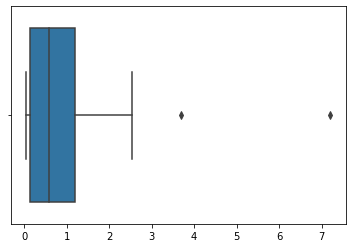

In [4]:
print_characteristics(xn)

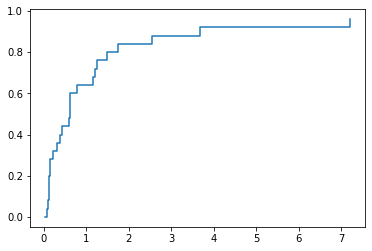

In [5]:
print_emp_func(xn)

Для гистограммы:
k = 5
delta = 1.4461525622


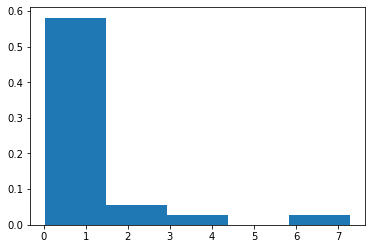

In [6]:
print_hist(xn)

In [7]:
bootstrap = make_bootstrap(xn)

Для гистограммы:
k = 10
delta = 0.1970546739356


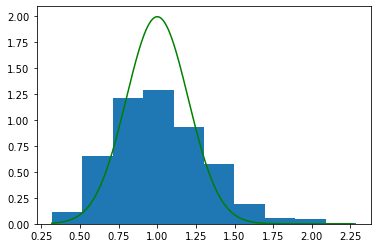

In [8]:
show_aver(xn, bootstrap, 1, 1/5)

Для гистограммы:
k = 10
delta = 0.4262994747231649


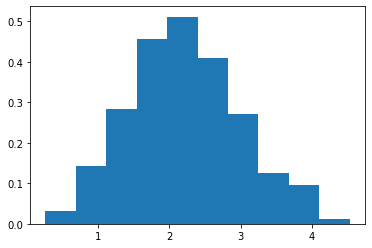

In [9]:
show_assym(bootstrap)

Для гистограммы:
k = 10
delta = 0.13814111481


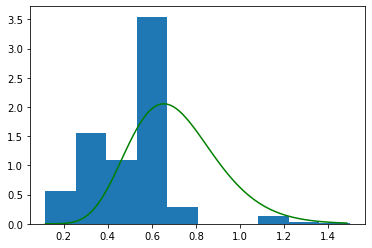

In [10]:
show_median(xn, bootstrap)